In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tanerzer","key":"6a738120362e1d0ee8a395b5fc9a6333"}'}

In [4]:
!ls -lha kaggle.json

!pip install -q kaggle

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

-rw-r--r-- 1 root root 64 Jun 20 14:35 kaggle.json


In [5]:
!kaggle datasets download -d abhikjha/utk-face-cropped

 91% 212M/232M [00:02<00:00, 87.2MB/s]
100% 232M/232M [00:02<00:00, 107MB/s] 


In [6]:
!ls

drive  kaggle.json  sample_data  utk-face-cropped.zip


In [ ]:
!unzip utk-face-cropped.zip

In [8]:
!ls

drive  kaggle.json  sample_data  utkcropped  utk-face-cropped.zip


In [10]:
import numpy as np
import pandas as pd
import os
import cv2

wd = os.getcwd()
path = os.path.join(wd, "utkcropped/utkcropped")
files = os.listdir(path)
size = len(files)
print("Veri sayisi", size)

Veri sayisi 23709


In [11]:
import cv2
images = []

for file in files:
    try:
   

        img = cv2.imread(path+'/'+file) # Using 0 to read image in grayscale mode
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        dim = (96, 96)
        img = cv2.resize(img, dim, interpolation=cv2.INTER_AREA) # resize the original image to 60 * 60 * 3

        images.append(img)
    except Exception as ex:
        continue

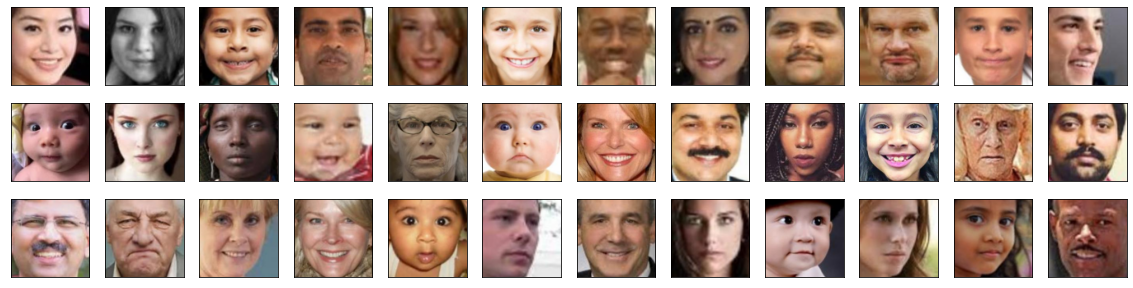

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
def visualize_data():
    images_to_show = 36
    per_row = 12
    fig = plt.figure(figsize=(20,5))
    for i in range(images_to_show):
        pos = (i // per_row, i % per_row)
        ax = plt.subplot2grid((int(images_to_show / per_row), per_row),
                              pos, xticks=[], yticks=[])
        ax.imshow(images[i])
    plt.show()
    fig.savefig('face_demo.png', dpi = 300, bbox_inches='tight')
    
visualize_data()

In [ ]:
gender = [i.split('_')[1] for i in files]

In [ ]:
values, counts = np.unique(gender, return_counts=True)
print(counts)

[12391 11317     1]


In [ ]:

say=0
for i in gender:
   say=say+1
   if i=="3":
     print(say)


22569


In [ ]:
gender[22568]

'1'

In [ ]:
gender[22568]="1"

In [ ]:
classes = []
for i in gender:
    i = int(i)
    classes.append(i)

In [ ]:
from keras.utils.np_utils import to_categorical

In [ ]:
categorical_labels = to_categorical(classes, num_classes=2)
categorical_labels[:5]

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
images=[]
i=0
for file in files:
  total=path+'/'+file
  print(total," i:",i)
  i=i+1
  image=cv2.imread(total)

  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image= cv2.resize(image,(64,64))
  images.append(image)

In [ ]:
x_data=np.array(images)
x_data.shape

(23709, 64, 64, 3)

In [ ]:
x = np.squeeze(x_data)
x = x.astype('float32')
x /= 255
x.shape

(23709, 64, 64, 3)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_valid, y_train, y_test = train_test_split(x, categorical_labels, test_size=0.2)
X_valid , X_test, y_valid, y_test = train_test_split(X_valid, y_test, test_size=0.5)

In [ ]:
print("X_train", X_train.shape)
print("X_valid", X_valid.shape)
print("X_test", X_test.shape)

X_train (18967, 64, 64, 3)
X_valid (2371, 64, 64, 3)
X_test (2371, 64, 64, 3)


In [ ]:
import tensorflow as tf
from keras.callbacks import ModelCheckpoint

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import keras
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense,Conv2D,Activation,MaxPool2D,Flatten,Dropout,BatchNormalization
from keras.utils import np_utils
from keras_preprocessing import image
from keras.callbacks import ModelCheckpoint

In [ ]:
model=Sequential()
#1.katman
model.add(Conv2D(64, 3, input_shape=(64, 64, 3)))
model.add(BatchNormalization())
model.add(Activation("relu"))

#2.katman
model.add(Conv2D(64,3))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.5)) # %50 unutma işlemi

#3.katman
model.add(Conv2D(32,3))
model.add(BatchNormalization())
model.add(Activation("relu"))

#4.katman
model.add(Conv2D(32,3))
model.add(BatchNormalization())
model.add(Activation("relu"))

#5.katman
model.add(Conv2D(32,3))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.5)) # %50 unutma işlemi

#tam baglanti katmani
model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.6))  # %60 unutma işlemi

#cıkış katmanı
model.add(Dense(2))
model.add(Activation("sigmoid")) #sınıflama işlemi 

#optimazyon basarım metrikleri
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

model.summary() #modelin özeti

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 62, 62, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 60, 60, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 60, 60, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 64)        0

In [ ]:
root="/gdrive/My Drive/Kaggle/"

In [ ]:
# en başarılı ağırlıkları kaydet
checkpointer = ModelCheckpoint(filepath=root + 'data/gender_face_model.h5', verbose=1, save_best_only=True)

epochs = 50
batchSize = 100 

# modeli çalıştır
hist = model.fit(X_train, y_train, 
                 epochs=epochs,
                 shuffle=True,
                 batch_size=batchSize, 
                 validation_data=(X_valid, y_valid),
                 callbacks=[checkpointer], verbose=2)

# save model to json
model_json = model.to_json()
with open(root + "data/gender_face_model.json", "w") as json_file:
    json_file.write(model_json)

Epoch 1/50
190/190 - 44s - loss: 0.5590 - accuracy: 0.7484 - val_loss: 0.7352 - val_accuracy: 0.5124

Epoch 00001: val_loss improved from inf to 0.73519, saving model to /gdrive/My Drive/Kaggle/data/gender_face_model.h5
Epoch 2/50
190/190 - 9s - loss: 0.3691 - accuracy: 0.8340 - val_loss: 0.4533 - val_accuracy: 0.7697

Epoch 00002: val_loss improved from 0.73519 to 0.45333, saving model to /gdrive/My Drive/Kaggle/data/gender_face_model.h5
Epoch 3/50
190/190 - 9s - loss: 0.3286 - accuracy: 0.8522 - val_loss: 0.2732 - val_accuracy: 0.8739

Epoch 00003: val_loss improved from 0.45333 to 0.27323, saving model to /gdrive/My Drive/Kaggle/data/gender_face_model.h5
Epoch 4/50
190/190 - 9s - loss: 0.3063 - accuracy: 0.8633 - val_loss: 0.2555 - val_accuracy: 0.8870

Epoch 00004: val_loss improved from 0.27323 to 0.25554, saving model to /gdrive/My Drive/Kaggle/data/gender_face_model.h5
Epoch 5/50
190/190 - 9s - loss: 0.2848 - accuracy: 0.8719 - val_loss: 0.2483 - val_accuracy: 0.8916

Epoch 0000

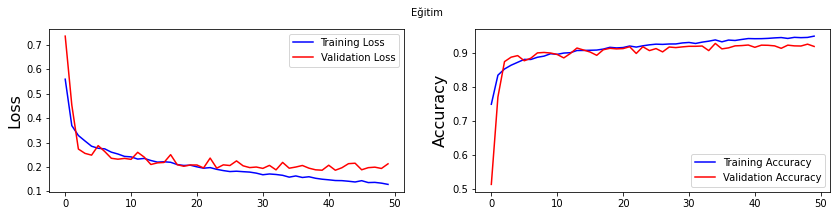

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.suptitle('Eğitim', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(hist.history['loss'], color='b', label='Training Loss')
plt.plot(hist.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(hist.history['accuracy'], color='b', label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], color='r', label='Validation Accuracy')
plt.legend(loc='lower right')

plt.show()


In [ ]:
loss,acc = model.evaluate(X_test,  y_test, verbose=2)
print("başarım oranı: {:5.2f}%".format(100*acc))

75/75 - 1s - loss: 0.2330 - accuracy: 0.9047
başarım oranı: 90.47%


In [ ]:
labels =["Erkek","Kadin"]
import matplotlib.pyplot as plt

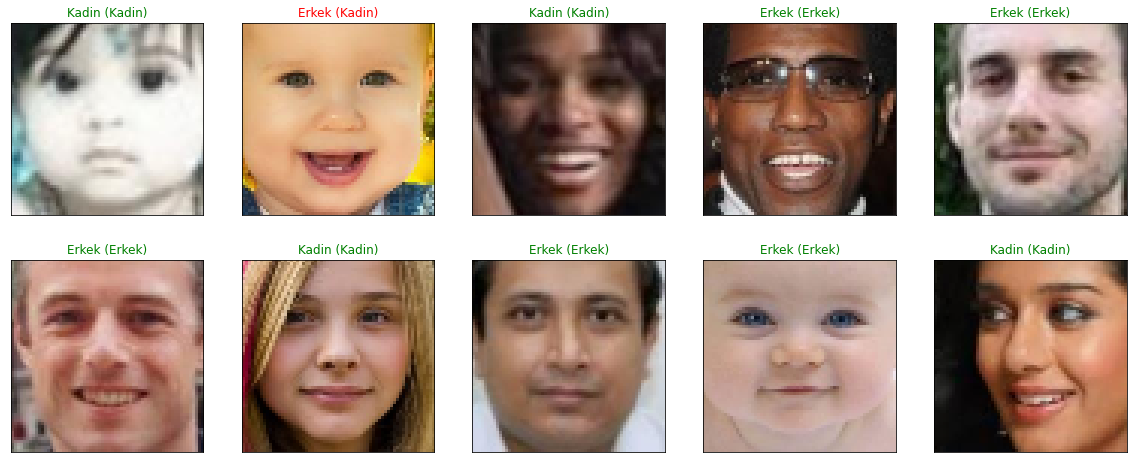

In [ ]:
Y = model.predict(X_test)

figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=10, replace=False)):
    ax = figure.add_subplot(2, 5, i + 1, xticks=[], yticks=[])
    
    ax.imshow(np.squeeze(X_test[index]))
    predict_index = np.argmax(Y[index])
    true_index = np.argmax(y_test[index])
    
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()

In [ ]:
import json
from keras.models import load_model
from keras.models import model_from_json
from keras.preprocessing import image

model_json = model.to_json()
with open("gender.json",'w') as json_file:
  json_file.write(model_json)

model.save('gender.h5')